<img src='https://radiant-assets.s3-us-west-2.amazonaws.com/PrimaryRadiantMLHubLogo.png' alt='Radiant MLHub Logo' width='300'/>

# Exploratory Data Analysis

This notebook walks you through the steps to exploratory data analysis.

In [1]:
from radiant_mlhub import Collection
import tarfile
import os
from pathlib import Path
import json

import datetime
import rasterio
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedShuffleSplit
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score,balanced_accuracy_score#,plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Load data

In [2]:
df = pd.DataFrame()
for value in ['df_mean_1','df_mean_2']:#['df_median_76_1','df_median_76_2','df_median_76_3','df_median_76_4','df_median_76_5']
    print('Reading Train df:', value)
    #read the pickle file
    picklefile = open(value, 'rb')
    #unpickle the dataframe
    df_tmp = pickle.load(picklefile)
    #close file
    picklefile.close()
    df = pd.concat([df,df_tmp])
    print(len(df_tmp))

Reading Train df: df_mean_1
3603
Reading Train df: df_mean_2
3571


In [3]:
df.reset_index(inplace=True,drop=True)
df

,field_id,20170401_B01,20170401_B02,20170401_B03,20170401_B04,20170401_B05,20170401_B06,20170401_B07,20170401_B08,20170401_B09,...,20171127_B04,20171127_B05,20171127_B06,20171127_B07,20171127_B08,20171127_B09,20171127_B11,20171127_B12,20171127_B8A,label
0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.728477,62.543046,70.079470,75.827815,84.913907,79.523179,113.364238,88.715232,84.841060,8
1,91.0,21.752000,25.448000,34.880000,45.668000,52.108000,56.116000,60.932000,65.100000,70.264000,...,41.936000,48.076000,52.612000,56.956000,62.296000,65.884000,107.628000,90.520000,65.084000,3
2,243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.823529,40.787330,65.063348,73.606335,77.072398,81.416290,88.045249,65.837104,80.013575,4
3,286.0,12.799127,15.448690,22.437773,29.348253,36.932314,45.018559,50.018559,54.330786,58.465066,...,26.365721,37.413755,54.512009,60.182314,65.986900,66.938865,71.457424,48.434498,66.165939,2
4,308.0,21.242424,28.000000,45.696970,63.393939,72.363636,76.393939,81.424242,84.363636,88.454545,...,67.060606,75.969697,79.515152,84.333333,90.515152,88.787879,120.030303,91.060606,91.393939,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,122508.0,17.882353,24.026738,39.647059,61.663102,74.443850,81.604278,89.454545,96.427807,100.459893,...,62.946524,70.994652,75.064171,79.877005,86.518717,87.967914,118.203209,88.754011,87.534759,6
7170,122532.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.694613,72.773900,74.878983,78.177542,82.427542,84.045524,118.080804,92.821700,83.049317,7
7171,122534.0,10.294444,13.766667,23.766667,33.611111,42.661111,50.727778,55.472222,59.577778,60.716667,...,39.122222,52.544444,72.127778,79.083333,85.738889,84.433333,95.638889,64.038889,84.761111,4
7172,122585.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.760870,56.510870,80.326087,89.239130,95.054348,91.978261,104.000000,82.456522,93.358696,4


In [4]:
df['label'].value_counts()

4    2133
7    1220
2    1037
1     767
6     684
5     503
3     474
8     209
9     147
Name: label, dtype: int64

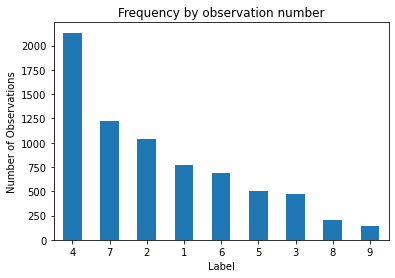

In [5]:
count_labels = pd.value_counts(df['label'], sort = True)
count_labels.plot(kind = 'bar', rot=0)
plt.title("Frequency by observation number")
plt.xlabel("Label")
plt.ylabel("Number of Observations");

In [6]:
#Verificamos si hay valores nulos a causa de presencia de nubes/humo (variable CLM)
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
print(df[df.isnull().any(axis=1)][null_columns].head())

   20170401_B01  20170401_B02  20170401_B03  20170401_B04  20170401_B05  \
0           NaN           NaN           NaN           NaN           NaN   
1     21.752000      25.44800     34.880000     45.668000     52.108000   
2           NaN           NaN           NaN           NaN           NaN   
3     12.799127      15.44869     22.437773     29.348253     36.932314   
4     21.242424      28.00000     45.696970     63.393939     72.363636   

   20170401_B06  20170401_B07  20170401_B08  20170401_B09  20170401_B11  ...  \
0           NaN           NaN           NaN           NaN           NaN  ...   
1     56.116000     60.932000     65.100000     70.264000    107.112000  ...   
2           NaN           NaN           NaN           NaN           NaN  ...   
3     45.018559     50.018559     54.330786     58.465066     68.554585  ...   
4     76.393939     81.424242     84.363636     88.454545    106.666667  ...   

   20171122_B03  20171122_B04  20171122_B05  20171122_B06  20171122_

In [7]:
df[df['label']==3].head(20)

,field_id,20170401_B01,20170401_B02,20170401_B03,20170401_B04,20170401_B05,20170401_B06,20170401_B07,20170401_B08,20170401_B09,...,20171127_B04,20171127_B05,20171127_B06,20171127_B07,20171127_B08,20171127_B09,20171127_B11,20171127_B12,20171127_B8A,label
1,91.0,21.752000,25.448000,34.880000,45.668000,52.108000,56.116000,60.932000,65.100000,70.264000,...,41.936000,48.076000,52.612000,56.956000,62.296000,65.884000,107.628000,90.520000,65.084000,3
7,453.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54.252174,61.017391,64.721739,68.573913,73.452174,73.234783,108.939130,96.365217,72.921739,3
14,705.0,22.708333,27.541667,41.333333,56.541667,62.000000,66.833333,68.708333,72.833333,75.000000,...,64.791667,70.291667,73.458333,76.916667,83.625000,82.041667,115.750000,101.041667,81.791667,3
15,726.0,14.077465,19.267606,36.169014,59.070423,66.535211,69.295775,72.760563,73.450704,74.302817,...,59.802817,66.464789,69.922535,72.950704,75.690141,74.816901,117.816901,98.239437,75.697183,3
20,883.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.378049,65.451220,70.792683,76.280488,82.634146,82.158537,118.975610,103.134146,81.329268,3
38,1477.0,20.348168,22.774869,32.272251,44.591623,53.157068,61.410995,67.821990,74.018325,79.518325,...,60.080000,69.510000,78.352500,84.650000,92.437500,95.747500,118.080000,95.930000,94.525000,3
62,2236.0,16.800000,22.600000,36.100000,52.600000,57.800000,60.800000,64.400000,65.800000,65.800000,...,70.000000,75.000000,80.000000,81.200000,89.000000,80.400000,123.200000,110.600000,87.800000,3
81,2790.0,22.067932,24.913472,39.634915,61.564706,70.743074,73.299051,76.615180,75.223909,91.463757,...,71.440987,80.748387,84.702467,88.032258,89.421632,88.546110,136.737761,121.780645,88.654269,3
98,3461.0,12.800000,20.600000,32.000000,40.200000,42.600000,49.400000,53.800000,56.400000,62.400000,...,50.800000,52.600000,69.200000,77.000000,78.800000,92.400000,89.400000,62.600000,81.400000,3
103,3510.0,22.099024,28.302650,40.677824,53.979079,60.818689,64.560669,68.333333,73.213389,101.755927,...,24.227336,36.372385,71.317992,82.513250,87.776848,85.732218,54.931660,39.736402,86.566248,3


In [8]:
#Test
field_id_example = 5274.0
idx_example = df[df['field_id']==field_id_example].index[0]
#df[df['field_id']==field_id_example].loc[:,['20170401_B8A','20170404_B8A','20171127_B8A']]

#### Nota:
- Se observa desbalanceo en el df de los cultivos a estudiar.
- En caso de presencia de nubes (ayudado por la variable CLM) se ha reemplazado los valores originales por valor Nan en las bandas espectrales de Sentinel-2, en diferentes momentos y diferentes parcelas debido a la presencia de nubes/humo.

### Preprocesamiento - Ingeniería de Variables

#### Tratamiento nubes/humo (outlier) bandas Sentinel-2

##### Demostración Gráfica Interpolación nubes/humo (outlier)

In [9]:
cols=[]
cols += (df.filter(regex='._B04').columns).tolist()
banda_ts = pd.DataFrame({
    'Fecha': df[cols].iloc[idx_example].filter(regex='.B04').index, 
    'Banda4':df[cols].iloc[idx_example].filter(regex='.B04').values
})
new = banda_ts['Fecha'].str.split("_", n = 1, expand = True) 
banda_ts['Fecha']= new[0] 

In [10]:
# Convert a datetime
banda_ts['Fecha'] = pd.to_datetime(banda_ts['Fecha'], dayfirst=True)
banda_ts.head()

,Fecha,Banda4
0,2017-04-01,17.435821
1,2017-04-11,26.173134
2,2017-04-21,25.797015
3,2017-05-01,25.600000
4,2017-05-11,NaN


In [11]:
banda_ts['Banda4'].isna().value_counts()/len(banda_ts)*100

False    65.789474
True     34.210526
Name: Banda4, dtype: float64

In [12]:
banda_ts = banda_ts.set_index('Fecha')

,Banda4
Fecha,
2017-04-01,17.435821
2017-04-11,26.173134
2017-04-21,25.797015
2017-05-01,25.600000
2017-05-11,NaN


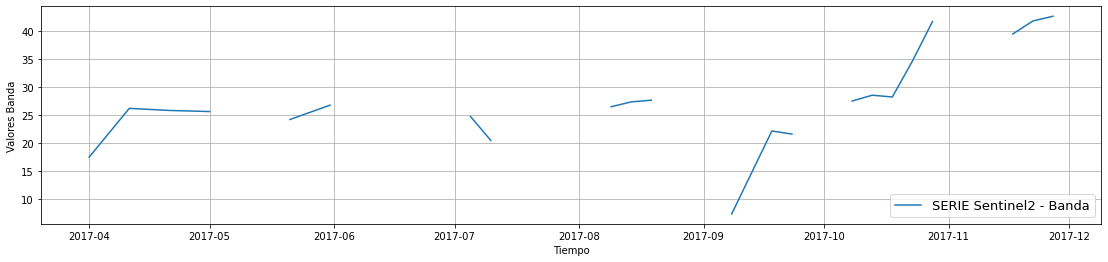

In [13]:
# Finalmente es posible plotear la serie temporal
fig, axes = plt.subplots(figsize=(19,4))
axes.plot(banda_ts.iloc[:,0], label='SERIE Sentinel2 - Banda')
axes.set_xlabel('Tiempo')
axes.set_ylabel('Valores Banda')
axes.grid(True)
axes.legend(loc='lower right', fontsize=13)
banda_ts.iloc[:,0:2].head()

In [14]:
banda_ts['Interp1'] = banda_ts['Banda4'].interpolate(method='linear',limit_direction ='backward')
banda_ts['Interp1']=banda_ts['Interp1'].interpolate(method='linear',limit_direction ='forward')
banda_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 2017-04-01 to 2017-11-27
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Banda4   25 non-null     float64
 1   Interp1  38 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


In [15]:
dt1 =pd.DataFrame({'B4_original':banda_ts['Banda4'].values,
                                          'Interp. B4':banda_ts['Interp1'].values,
                                          }, columns=['B4_original','Interp. B4'],index=banda_ts.index)
dt1.head(10)

,B4_original,Interp. B4
Fecha,,
2017-04-01,17.435821,17.435821
2017-04-11,26.173134,26.173134
2017-04-21,25.797015,25.797015
2017-05-01,25.600000,25.600000
2017-05-11,NaN,24.888060
2017-05-21,24.176119,24.176119
2017-05-31,26.749254,26.749254
2017-06-10,NaN,24.713433
2017-06-20,22.677612,22.677612


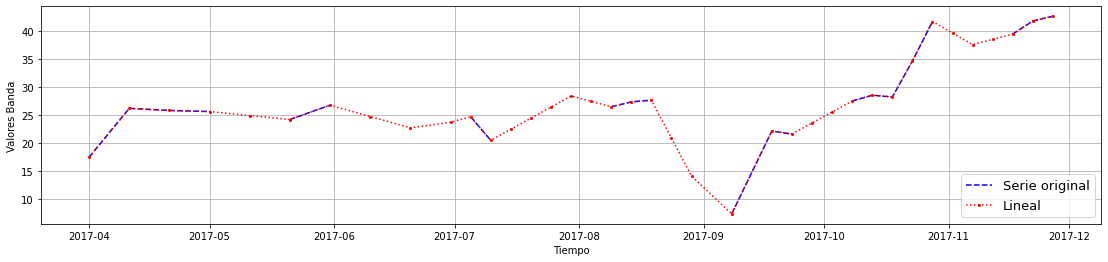

In [16]:
# Finalmente es posible plotear la serie temporal
fig, axes = plt.subplots(figsize=(19,4))
axes.plot(dt1['B4_original'], linestyle='--', ms = 4, color = 'blue', label='Serie original')
axes.plot(dt1['Interp. B4'], marker='.', ms=4, linestyle=':',color='red', label='Lineal')
axes.set_xlabel('Tiempo')
axes.set_ylabel('Valores Banda')
axes.grid(True)
axes.legend(loc='lower right', fontsize=13);

In [17]:
st = dt1['Interp. B4'].copy()

In [18]:
#Suavizado de Hamunyela
for i in np.arange(1, (len(st)-1),1):
    st[i] = np.where(((st[i]-st[i-1] < -0.01*st[i-1]) & 
                     (st[i]-st[i+1] < -0.01*st[i+1])), 
                     (st[i-1]+st[i+1])/2, st[i])

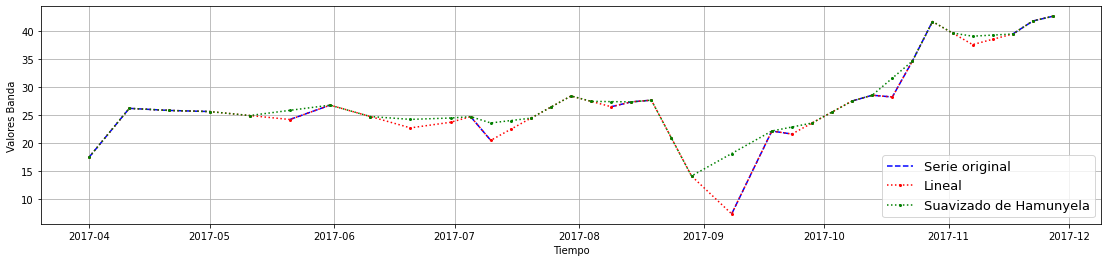

In [19]:
# Finalmente es posible plotear la serie temporal
fig, axes = plt.subplots(figsize=(19,4))
axes.plot(dt1['B4_original'], linestyle='--', ms = 4, color = 'blue', label='Serie original')
axes.plot(dt1['Interp. B4'], marker='.', ms=4, linestyle=':',color='red', label='Lineal')
axes.plot(st, marker='.', ms=4, linestyle=':',color='green', label='Suavizado de Hamunyela')
axes.set_xlabel('Tiempo')
axes.set_ylabel('Valores Banda')
axes.grid(True)
axes.legend(loc='lower right', fontsize=13);

##### Aplicación al DF Interpolación nubes/humo (outlier)

In [20]:
def suavizado(col):
    cols=[]
    cols += (df.filter(regex=col).columns).tolist()
    df_banda = pd.DataFrame(columns = cols)
    df_banda_tmp = pd.DataFrame(columns = cols)
    banda = pd.DataFrame(columns = [col,'{}_I'.format(col)])
    for index, row in  df.iterrows():
        banda[col] = row.filter(regex='._{}'.format(col)).values
        #Interpolación
        banda['{}_I'.format(col)] = banda[col].interpolate(method='linear',limit_direction ='backward')
        banda['{}_I'.format(col)] =  banda['{}_I'.format(col)].interpolate(method='linear',limit_direction ='forward')
        #banda['{}_I'.format(col)] = banda[col].interpolate(method='spline',order=1,limit_direction ='backward')
        #banda['{}_I'.format(col)] =  banda['{}_I'.format(col)].interpolate(method='spline',order=1,limit_direction ='forward')
        # Dejamos los valores de la banda en una variable
        st = banda['{}_I'.format(col)].copy()
        #Suavizado de Hamunyela
        """for i in np.arange(1, (len(st)-1),1):
            st[i] = np.where(((st[i]-st[i-1] < -0.01*st[i-1]) & 
                              (st[i]-st[i+1] < -0.01*st[i+1])), 
                             (st[i-1]+st[i+1])/2, st[i])"""
        df_banda_tmp = pd.DataFrame(data = st.values.reshape(1,len(df_banda_tmp.columns)), columns = df_banda_tmp.columns)
        frames = [df_banda, df_banda_tmp]
        df_banda = pd.concat(frames)
        df_banda=df_banda.reset_index(drop=True)
    return df_banda

In [21]:
bands = ['B01','B02','B03','B04','B05','B06','B07','B08','B8A','B09','B11', 'B12']
df_final = df.loc[:, ['field_id','label']]
for b in bands:
    df_banda = suavizado(b)
    df_final = pd.merge(df_final, df_banda, right_index=True, left_index=True)

In [22]:
df = df_final.copy()
df = df.reset_index(drop=True)
df

,field_id,label,20170401_B01,20170411_B01,20170421_B01,20170501_B01,20170511_B01,20170521_B01,20170531_B01,20170610_B01,...,20171013_B12,20171018_B12,20171023_B12,20171028_B12,20171102_B12,20171107_B12,20171112_B12,20171117_B12,20171122_B12,20171127_B12
0,4.0,8,25.953642,25.953642,18.728477,16.291391,17.910596,19.529801,24.536424,19.682119,...,55.887417,39.781457,56.900662,57.423841,66.562914,75.701987,81.337748,86.973510,87.844371,88.715232
1,91.0,3,21.752000,20.756000,20.628000,19.848000,18.792000,17.736000,17.788000,15.740000,...,80.744000,69.712000,79.048000,78.560000,82.588000,86.616000,92.116000,88.128000,89.324000,90.520000
2,243.0,4,1.144796,1.144796,1.343891,1.846154,0.393665,6.864253,13.916290,20.968326,...,71.393665,17.312217,69.868778,62.360825,71.067873,70.633484,69.180995,71.533937,68.685520,65.837104
3,286.0,2,12.799127,11.468341,10.575328,10.588792,10.602256,10.615721,10.888646,8.284934,...,45.653930,33.513100,25.922064,43.769651,45.152838,46.536026,47.268559,48.001092,48.217795,48.434498
4,308.0,7,21.242424,15.969697,18.969697,15.676768,12.383838,9.090909,16.393939,12.833333,...,51.939394,36.333333,57.151515,59.121212,61.393939,63.666667,68.606061,73.545455,82.303030,91.060606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,122508.0,6,17.882353,12.812834,16.566845,14.860963,13.155080,11.449198,16.561497,12.622995,...,62.545455,51.497326,68.224599,67.877005,70.949198,74.021390,75.510695,77.000000,82.877005,88.754011
7170,122532.0,7,11.643778,11.643778,17.743551,17.719651,17.695751,17.671851,17.988998,14.575493,...,54.405918,50.094461,60.503414,61.616085,64.430956,67.245827,79.133725,91.021624,91.921662,92.821700
7171,122534.0,4,10.294444,11.822222,10.816667,34.355556,22.438889,10.522222,11.322222,8.565278,...,63.666667,34.300000,65.255556,60.761111,61.269444,61.777778,62.872222,63.966667,37.083333,64.038889
7172,122585.0,4,8.293478,8.293478,7.097826,11.336957,10.956522,10.576087,16.793478,11.945652,...,85.195652,55.554348,83.413043,79.597826,80.788043,81.978261,81.652174,81.326087,81.891304,82.456522


In [23]:
#Verificamos si hay valores nulos a causa de presencia de nubes/humo (variable CLM)
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
print(df[df.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


In [24]:
#Test
#df[df['field_id']==field_id_example].loc[:,['20170401_B8A','20170404_B8A','20171127_B8A']]

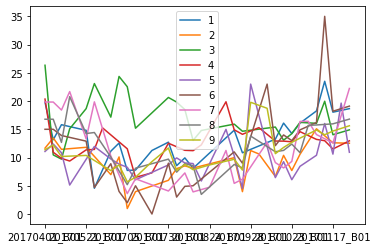

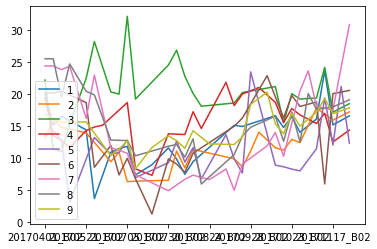

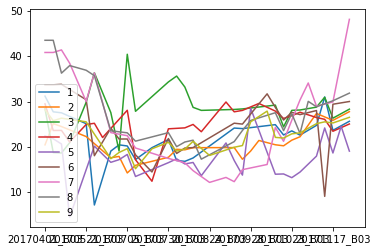

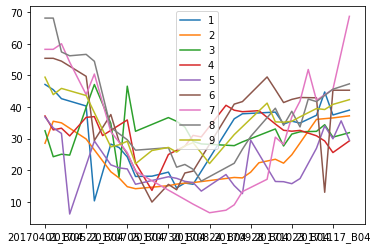

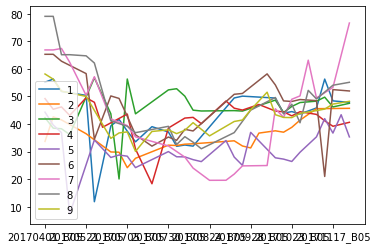

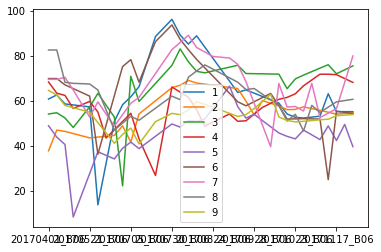

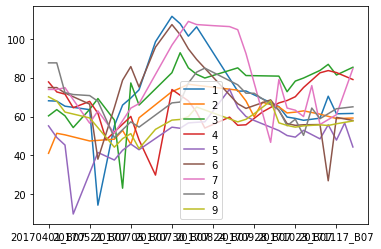

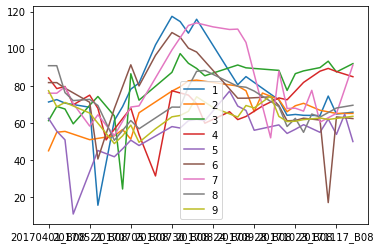

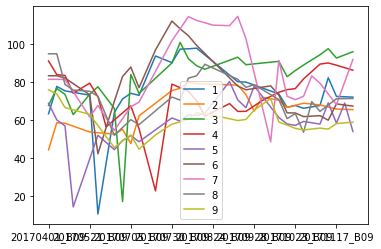

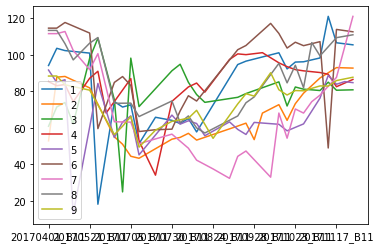

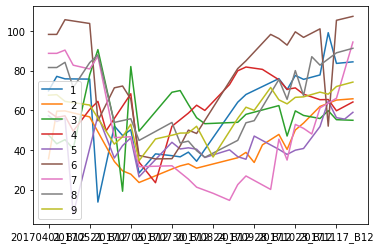

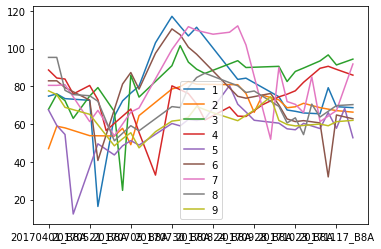

In [25]:
bands=['B01', 'B02', 'B03', 'B04', 'B05','B06', 'B07', 'B08', 'B09', 'B11', 'B12', 'B8A']
for band in bands:
    list_index = [7115,7122,7142,10,97,50,25,7123,7005]
    df_tmp = df.loc[list_index,df.filter(regex='._' + band).columns]
    df_tmp = df_tmp.rename(index={7115: 1,7122: 2,7142: 3,10: 4,97: 5,50: 6,25: 7,7123: 8,7005: 9})
    list_index = df['label'].unique().tolist()
    list_index.sort()
    df_tmp.loc[list_index,:].T.plot()

#### Cálculo Indices de vegetación

Para el cálculo de los diferentes índices de vegetación me he basado en los siguientes links:

- [Link1](https://acolita.com/lista-de-indices-espectrales-en-sentinel-2-y-landsat/)
- [Link2](https://mappinggis.com/2020/07/los-6-indices-de-vegetacion-para-completar-el-ndvi/#:~:text=Los%20%C3%8Dndices%20de%20Vegetaci%C3%B3n%20son,suelo%2C%20la%20iluminaci%C3%B3n%2C%20etc.)

In [26]:
datetime_variable = 38 #76

- ##### Indice NDVI

In [27]:
# NDVI :(B8A-B04)/(B8A+B04)
B8A_features_col = df.filter(regex='._B8A').columns
B4_features_col = df.filter(regex='._B04').columns
NDVI = []
for i in range(datetime_variable) :
    B8A = '{}'.format(B8A_features_col[i])
    B4 = '{}'.format(B4_features_col[i])
    NDVI.append('{}_NDVI'.format(B8A.split("_")[0]))
    df['{}_NDVI'.format(B8A.split("_")[0])] = (df[B8A]-df[B4])/(df[B8A]+df[B4])

- ##### Indice SLAVI

In [28]:
# SLAVI :(B8A)/(B8A+B12)
#https://www.indexdatabase.de/db/i-single.php?id=89
B12_features_col = df.filter(regex='._B12').columns
SLAVI = []
for i in range(datetime_variable) :
    B8A = '{}'.format(B8A_features_col[i])
    B12 = '{}'.format(B12_features_col[i])
    SLAVI.append('{}_SLAVI'.format(B8A.split("_")[0]))
    df['{}_SLAVI'.format(B8A.split("_")[0])] = (df[B8A])/(df[B8A]+df[B12])

- ##### Indice SAVI

In [29]:
# # SAVI :1.5*(B8A-B04)/(B8A+B04+0.5)
#SAVI = []
#for i in range(datetime_variable) :
#    B8A = '{}'.format(B8A_features_col[i])
#    B4 = '{}'.format(B4_features_col[i])
#    SAVI.append('{}_SAVI'.format(B8A.split("_")[0]))
#    df['{}_SAVI'.format(B8A.split("_")[0])] = (1.5*(df[B8A].divide(10000)-df[B4].divide(10000))/(df[B8A].divide(10000)+df[B4].divide(10000)+0.5)).multiply(10000)

- ##### Indice RECI

In [30]:
#RECI :(B08/B04)-1
#B8_features_col = df.filter(regex='._B08').columns
#RECI = []
#for i in range(datetime_variable) :
#    B8 = '{}'.format(B8_features_col[i])
#    B4 = '{}'.format(B4_features_col[i])
#    RECI.append('{}_RECI'.format(B8.split("_")[0]))
#    df['{}_RECI'.format(B8.split("_")[0])] = (((df[B8]).divide(10000)/(df[B4]).divide(10000))-1).multiply(10000)

- ##### Indice MSI

In [31]:
# MSI :B11/B8A
B11_features_col = df.filter(regex='._B11').columns
MSI = []
for i in range(datetime_variable) :
    B8A = '{}'.format(B8A_features_col[i])
    B11 = '{}'.format(B11_features_col[i])
    MSI.append('{}_MSI'.format(B8A.split("_")[0]))
    df['{}_MSI'.format(B8A.split("_")[0])] = (df[B11])/(df[B8A])

- ##### Indice NDRE

In [32]:
# NDRE :(B09-B05)/(B09+B05)
B9_features_col = df.filter(regex='._B09').columns
B5_features_col = df.filter(regex='._B05').columns
NDRE = []
for i in range(datetime_variable) :
    B9 = '{}'.format(B9_features_col[i])
    B5 = '{}'.format(B5_features_col[i])
    NDRE.append('{}_NDRE'.format(B9.split("_")[0]))
    df['{}_NDRE'.format(B9.split("_")[0])] =  (df[B9]-df[B5])/(df[B9]+df[B5])

In [33]:
#Verificamos si hay valores nulos a causa de presencia de nubes/humo (variable CLM)
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
print(df[df.isnull().any(axis=1)][null_columns])

Empty DataFrame
Columns: []
Index: []


#### Cálculo de Tasseled Cap

La transformación Tasseled Cap es una combinación lineal de información espectral en un conjunto menor de bandas, normalmente tres ejes. A través de estas tres bandas se simplifican los componentes espectrales y permite tratarlas como variables físicas: brillo, verdor y humedad. 
Me he basado en los siguientes links:

- [Link1](https://geoinnova.org/blog-territorio/calculo-de-tasseled-cap-para-imagenes-sentinel-2-con-r/)

- ##### Brightness

In [34]:
# Tasselled Cap - brightness: 0.3510*B02+ 0.3813*B03 + 0.3437*B04+ 0.7196*B08 + 0.2396*B11 + 0.1949*B12
B2_features_col = df.filter(regex='._B02').columns
B3_features_col = df.filter(regex='._B03').columns
B8_features_col = df.filter(regex='._B08').columns
Brightness = []
for i in range(datetime_variable) :
    B2 = '{}'.format(B2_features_col[i])
    B3 = '{}'.format(B3_features_col[i])
    B4 = '{}'.format(B4_features_col[i])
    B8 = '{}'.format(B8_features_col[i])
    B11 = '{}'.format(B11_features_col[i])
    B12 = '{}'.format(B12_features_col[i])
    Brightness.append('{}_Brightness'.format(B2.split("_")[0]))
    df['{}_Brightness'.format(B2.split("_")[0])] = 0.3510*df[B2]+ 0.3813*df[B3] + 0.3437*df[B4]+ 0.7196*df[B8] 
    + 0.2396*df[B11] + 0.1949*df[B12]

- ##### Greeness 

In [35]:
# Tasselled Cap – greenness: (-0.3599* B02) + (-0.3533*B03) +(-0.4734*B04) + 0.6633*B08  +0.0087*B11 + (-0.2856*B12)
Greenness = []
for i in range(datetime_variable) :
    B2 = '{}'.format(B2_features_col[i])
    B3 = '{}'.format(B3_features_col[i])
    B4 = '{}'.format(B4_features_col[i])
    B8 = '{}'.format(B8_features_col[i])
    B11 = '{}'.format(B11_features_col[i])
    B12 = '{}'.format(B12_features_col[i])
    Greenness.append('{}_Greeness'.format(B2.split("_")[0]))
    df['{}_Greeness'.format(B2.split("_")[0])] = (-0.3599*df[B2])+ (-0.3533*df[B3]) + (-0.4734*df[B4])+ 0.6633*df[B8] 
    + 0.0087*df[B11] + (-0.2856*df[B12])

- ##### Wetness

In [36]:
# Tasselled Cap - wetness: (0.2578*B02 + 0.2305*B03 + 0.0883*B04 + 0.1071*B08 + (-0.7611*B11) + (-0.5308*B12))
Wetness = []
for i in range(datetime_variable) :
    B2 = '{}'.format(B2_features_col[i])
    B3 = '{}'.format(B3_features_col[i])
    B4 = '{}'.format(B4_features_col[i])
    B8 = '{}'.format(B8_features_col[i])
    B11 = '{}'.format(B11_features_col[i])
    B12 = '{}'.format(B12_features_col[i])
    Wetness.append('{}_Wetness'.format(B2.split("_")[0]))
    df['{}_Wetness'.format(B2.split("_")[0])] = (0.2578*df[B2]+ 0.2305*df[B3] + 0.0883*df[B4] + 0.1071*df[B8] 
    + (-0.7611*df[B11]) + (-0.5308*df[B12]))

#### Cálculo Estádisticos para cada Indice espectral (PENDIENTE)

Se procede a calcular ciertas medidas estadísticas por cada índice de vegetación calculado a partir del aspecto temporal de los mismos:
   - Desviación standard, 
   - Máximo, 
   - Mínimo y 
   - Media

In [37]:
df = df.reset_index(drop=True)
df

,field_id,label,20170401_B01,20170411_B01,20170421_B01,20170501_B01,20170511_B01,20170521_B01,20170531_B01,20170610_B01,...,20171013_Wetness,20171018_Wetness,20171023_Wetness,20171028_Wetness,20171102_Wetness,20171107_Wetness,20171112_Wetness,20171117_Wetness,20171122_Wetness,20171127_Wetness
0,4.0,8,25.953642,25.953642,18.728477,16.291391,17.910596,19.529801,24.536424,19.682119,...,-64.017491,-47.763876,-63.864977,-65.917326,-77.755807,-89.594289,-95.652043,-101.709797,-102.124805,-102.539812
1,91.0,3,21.752000,20.756000,20.628000,19.848000,18.792000,17.736000,17.788000,15.740000,...,-94.151722,-84.623725,-91.538240,-92.056161,-97.386933,-102.717704,-106.814190,-105.046812,-105.678978,-106.311145
2,243.0,4,1.144796,1.144796,1.343891,1.846154,0.393665,6.864253,13.916290,20.968326,...,-88.324990,-23.118501,-88.251745,-63.588023,-89.739805,-85.956564,-86.806865,-87.530870,-85.046064,-82.561258
3,286.0,2,12.799127,11.468341,10.575328,10.588792,10.602256,10.615721,10.888646,8.284934,...,-57.148951,-44.049082,-31.422432,-55.841396,-57.642242,-59.443088,-60.479749,-61.516410,-61.534691,-61.552973
4,308.0,7,21.242424,15.969697,18.969697,15.676768,12.383838,9.090909,16.393939,12.833333,...,-61.933621,-42.721094,-66.380573,-71.138094,-74.118324,-77.098555,-84.515405,-91.932255,-98.760894,-105.589533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,122508.0,6,17.882353,12.812834,16.566845,14.860963,13.155080,11.449198,16.561497,12.622995,...,-76.498798,-64.667862,-82.010437,-83.497148,-87.353101,-91.209055,-93.866849,-96.524644,-100.460698,-104.396753
7170,122532.0,7,11.643778,11.643778,17.743551,17.719651,17.695751,17.671851,17.988998,14.575493,...,-65.878608,-60.422980,-70.217286,-72.594191,-75.573813,-78.553436,-91.528324,-104.503211,-104.870534,-105.237856
7171,122534.0,4,10.294444,11.822222,10.816667,34.355556,22.438889,10.522222,11.322222,8.565278,...,-79.504275,-49.028632,-81.359017,-77.427872,-77.963383,-78.498894,-79.984453,-81.470013,-48.554729,-82.499479
7172,122585.0,4,8.293478,8.293478,7.097826,11.336957,10.956522,10.576087,16.793478,11.945652,...,-95.611139,-70.040059,-94.802032,-93.071440,-94.035583,-94.999725,-95.229316,-95.458907,-95.665667,-95.872427


In [38]:
#Verificamos si hay valores nulos a causa de presencia de nubes/humo (variable CLM)
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
print(df[df.isnull().any(axis=1)][null_columns])

Empty DataFrame
Columns: []
Index: []


In [39]:
#df.drop([4548],inplace=True) #In case dataset median, remove the row

In [40]:
#correlations = df.corr()
#f, ax = plt.subplots(figsize = (20,20))
#sns.heatmap(correlations, annot=True);
#sns.heatmap(df.iloc[:,:100].corr());
#sns.heatmap(df.iloc[:,100:200].corr());

In [41]:
#bands=['B01', 'B02', 'B03', 'B04', 'B05','B06', 'B07', 'B08', 'B09', 'B11', 'B12', 'B8A']
bands=['B01', 'B03']
df_tmp=df.copy()
for band in bands:
    df_tmp.drop(df_tmp.filter(regex='.'+band).columns, axis=1,inplace=True)
df_tmp.head()

,field_id,label,20170401_B02,20170411_B02,20170421_B02,20170501_B02,20170511_B02,20170521_B02,20170531_B02,20170610_B02,...,20171013_Wetness,20171018_Wetness,20171023_Wetness,20171028_Wetness,20171102_Wetness,20171107_Wetness,20171112_Wetness,20171117_Wetness,20171122_Wetness,20171127_Wetness
0,4.0,8,33.019868,33.019868,28.245033,19.536424,22.321192,25.105960,31.549669,25.165563,...,-64.017491,-47.763876,-63.864977,-65.917326,-77.755807,-89.594289,-95.652043,-101.709797,-102.124805,-102.539812
1,91.0,3,25.448000,24.988000,25.044000,23.392000,21.956000,20.520000,20.932000,18.282000,...,-94.151722,-84.623725,-91.538240,-92.056161,-97.386933,-102.717704,-106.814190,-105.046812,-105.678978,-106.311145
2,243.0,4,2.529412,2.529412,3.076923,3.348416,1.846154,7.497738,13.414027,19.330317,...,-88.324990,-23.118501,-88.251745,-63.588023,-89.739805,-85.956564,-86.806865,-87.530870,-85.046064,-82.561258
3,286.0,2,15.448690,13.709607,13.412664,13.186681,12.960699,12.734716,12.648472,9.753275,...,-57.148951,-44.049082,-31.422432,-55.841396,-57.642242,-59.443088,-60.479749,-61.516410,-61.534691,-61.552973
4,308.0,7,28.000000,23.848485,26.030303,22.414141,18.797980,15.181818,20.424242,15.590909,...,-61.933621,-42.721094,-66.380573,-71.138094,-74.118324,-77.098555,-84.515405,-91.932255,-98.760894,-105.589533


### Models

https://relopezbriega.github.io/blog/2016/05/29/machine-learning-con-python-sobreajuste/

In [42]:
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Matriz Confusión',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [43]:
l_modelo=[]
l_exactitud=[]
l_bexactitud=[]
l_precision=[]
l_exhaustividad=[]
l_f1=[]
#Función que nos permite representar las métricas
def metricas_modelos(modelo,y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)

    #print(u'Matriz de confusión:')
    #print(cm)

    print("-----Métricas------")
    print(u'Número de muestras clasificadas correctamente:', accuracy_score(y_true, y_pred, normalize=False))
    print(u'Exactitud:', accuracy_score(y_true, y_pred))
    print("Balance Accuracy score:",balanced_accuracy_score(y_true, y_pred))
    print(u'Precision:', precision_score(y_true, y_pred,average='weighted'))
    print(u'Exhaustividad:', recall_score(y_true, y_pred,average='weighted'))
    print(u'F1:', f1_score(y_true, y_pred,average='weighted'))
    print("-------------------")
    print(classification_report(y_true, y_pred))
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=labels)
    
    l_modelo.append(modelo)
    l_exactitud.append(accuracy_score(y_true, y_pred)*100)
    l_bexactitud.append(balanced_accuracy_score(y_true, y_pred)*100)
    l_precision.append(precision_score(y_true, y_pred,average='weighted')*100)
    l_exhaustividad.append(recall_score(y_true, y_pred,average='weighted')*100)
    l_f1.append(f1_score(y_true, y_pred,average='weighted')*100)

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
class PreprocessTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,num_features):
        #cat_features, num_features
        #self.cat_features = cat_features
        self.num_features = num_features
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        df = X.copy()
        # Treat ? workclass as unknown
        #df.loc[df['workclass'] == '?', 'workclass'] = 'Unknown'
        # Too many categories, just convert to US and Non-US
        #df.loc[df['native.country']!='United-States','native.country']='non_usa'
        # Convert columns to categorical
        #for name in self.cat_features:
        #    col = pd.Categorical(df[name])
        #    df[name] = col.codes
        # Normalize numerical features
        scaler = StandardScaler() #MinMaxScaler()
        df[self.num_features] = scaler.fit_transform(df[self.num_features])
        return df

In [45]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
  df.drop(['field_id','label'], axis=1),
  df['label'],
  test_size=0.3,
  random_state=42,
  shuffle=True,
  stratify=df['label']
)

In [46]:
X_train.shape

(5021, 722)

In [47]:
###Nos quedamos a partir de la fecha 8 y creamos el dataset de train y test
#list_date = [value.replace('_B01','') for value in X_train.filter(regex='._B01').columns.values]
#list_filter=[X_train.filter(regex=column+'_.').columns.values.tolist() for column in list_date[8:]]
#list_filter = [item for sublist in list_filter for item in sublist]
#X_train = X_train[list_filter]
#X_test = X_test[list_filter]

#### Reducción Dimensionalidad

- En primer lugar vamos a verificar con cuantas componentes de las 12 bandas nos quedaremos por cada fecha que componen nuestro dataset (38) y que expliquen más del 85% de la varianza de los datos
- Una vez que verifiquemos por cada fecha, conformaremos un datasets para train y otro para test con las nuevas componentes resultantes.
##### Verificamos cuantos componentes pricnipales por cada una de las 38 fechas, explican más del 85% de la varianza

---- Date: 20170401
Suma porcentajes de las 2 PC: 0.9051372552176346
---- Date: 20170411
Suma porcentajes de las 2 PC: 0.9269925251123736
---- Date: 20170421
Suma porcentajes de las 2 PC: 0.9341036271129705
---- Date: 20170501
Suma porcentajes de las 2 PC: 0.9296952621162795
---- Date: 20170511
Suma porcentajes de las 2 PC: 0.9154632006166745
---- Date: 20170521
Suma porcentajes de las 2 PC: 0.9174284964208882
---- Date: 20170531
Suma porcentajes de las 2 PC: 0.9185991783585138
---- Date: 20170610
Suma porcentajes de las 2 PC: 0.8937385383487465
---- Date: 20170620
Suma porcentajes de las 2 PC: 0.8891103516252462
---- Date: 20170630
Suma porcentajes de las 2 PC: 0.8841807214557993
---- Date: 20170705
Suma porcentajes de las 2 PC: 0.9245111954685414
---- Date: 20170710
Suma porcentajes de las 2 PC: 0.9195662321992036
---- Date: 20170715
Suma porcentajes de las 2 PC: 0.8951477782769692
---- Date: 20170720
Suma porcentajes de las 2 PC: 0.9065485969626426
---- Date: 20170725
Suma porcentaj

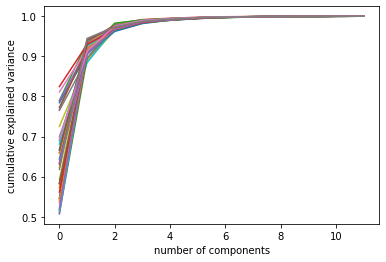

In [48]:
scaler = StandardScaler() #MinMaxScaler()
pca=PCA(n_components=12)
list_date = [value.replace('_B01','') for value in X_train.filter(regex='._B01').columns.values]
bands=['B01', 'B02', 'B03', 'B04', 'B05','B06', 'B07', 'B08', 'B09', 'B11', 'B12', 'B8A']
list_filter=[]
for value in list_date:
    for band in bands:
        list_filter.append(value+'_'+band)
    X_train_tmp = scaler.fit_transform(X_train[list_filter])
    X_test_tmp = scaler.transform (X_test[list_filter])
    X_train_tmp = pca.fit_transform(X_train_tmp)
    X_test_tmp = pca.transform(X_test_tmp)
    #graficamos el acumulado de varianza explicada en las nuevas dimensiones
    print('---- Date:',value)
    print('Suma porcentajes de las 2 PC:',sum(pca.explained_variance_ratio_[0:2]))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    #plt.show()
    list_filter=[]

##### Conclusión PCA:
Se puede concluir que aplicando un PCA = 2 por cada una de las 38 fechas que conforman nuestro dataset, reducimos la dimensionalidad de las 12 bandas a 2 componentes, explicando más del 85% de la variaza de los datos.

##### Confección de los datasets (train, test) con las componentes resultantes.

In [49]:
X_train_12_to_2 = np.empty((X_train.shape[0], 0))
X_test_12_to_2 = np.empty((X_test.shape[0], 0))
scaler = StandardScaler() #MinMaxScaler()
pca=PCA(n_components=2)
list_date = [value.replace('_B01','') for value in X_train.filter(regex='._B01').columns.values]
bands=['B01', 'B02', 'B03', 'B04', 'B05','B06', 'B07', 'B08', 'B09', 'B11', 'B12', 'B8A']
list_filter=[]
for value in list_date:
    for band in bands:
        list_filter.append(value+'_'+band)
    X_train_tmp = scaler.fit_transform(X_train[list_filter])
    X_test_tmp = scaler.transform (X_test[list_filter])
    X_train_tmp = pca.fit_transform(X_train_tmp)
    X_test_tmp = pca.transform(X_test_tmp)
    X_train_12_to_2 = np.append(X_train_12_to_2, X_train_tmp, axis=1)
    X_test_12_to_2 = np.append(X_test_12_to_2, X_test_tmp, axis=1)
    list_filter=[]
X_train_12_to_2.shape,X_test_12_to_2.shape

((5021, 76), (2153, 76))

#### Escalado Estándard:

Escalamos/Normalizamos para el resto de variables: índices, Brightness, Greeness y Wetness calculados previamente. Es una buena práctica, para que los valores de las diferentes variables se encuentren en un mismo rango y de esta manera no influya una más que otra al momento de entrenar los modelos propuestos.
Este escalado, utiliza la media y la desviación típica para escalar y es bastante sensible en presencia de los outlier (humo/nubes) identificados. De todos modo ha sido el escalado que me ha dado mejor resultado por eso lo he seleccionado.

In [50]:
list_columns = ['NDVI', 'SLAVI', 'MSI', 'NDRE', 'Brightness', 'Greeness', 'Wetness']
list_filter=[X_train.filter(regex='._'+column).columns.values.tolist() for column in list_columns]
list_filter = [item for sublist in list_filter for item in sublist]

In [51]:
scaler = StandardScaler() #MinMaxScaler()
X_train_rest = scaler.fit_transform(X_train[list_filter])
X_test_rest = scaler.transform (X_test[list_filter])
X_train_rest.shape, X_test_rest.shape

((5021, 266), (2153, 266))

In [52]:
X_train = np.append(X_train_rest, X_train_12_to_2, axis=1)
X_test = np.append(X_test_rest, X_test_12_to_2, axis=1)
print(X_train.shape, X_test.shape)
y_train.value_counts()

(5021, 342) (2153, 342)


4    1493
7     854
2     726
1     537
6     478
5     352
3     332
8     146
9     103
Name: label, dtype: int64

### Techniques for balancing the Dataset

##### Undersampling Technique: Random Undersampling

In [53]:
#from imblearn.under_sampling import RandomUnderSampler
#rus = RandomUnderSampler(
#    sampling_strategy='auto',  # samples only from majority class
#    random_state=0,  # for reproducibility
#    replacement=True # if it should resample with replacement
#)
#X_train, y_train = rus.fit_resample(X_train, y_train)
#print(X_train.shape, y_train.shape)
#y_train.value_counts()

##### Undersampling Technique: Condensed Nearest Neighbours (CNN)

- **Criteria for data exclusion**: Samples outside the boundary between the classes
- **Final Dataset size**: varies

**Caution:**

- CNN tends to add noise to the undersampled dataset
- Computationally expensive, because it trains 1 KNN every time an observation is added to the minority class group.

In [54]:
#from imblearn.under_sampling import CondensedNearestNeighbour
#cnn = CondensedNearestNeighbour(
#    sampling_strategy='auto',  # undersamples only the majority class
#    random_state=0,  # for reproducibility
#    n_neighbors=11,
#    n_jobs=-1) 

#X_resampled, y_resampled = cnn.fit_resample(X_train, y_train)
#X_train, y_train = cnn.fit_resample(X_train, y_train)
#print(X_train.shape, y_train.shape)
#y_train.value_counts()

##### Undersampling Technique: Tomek Links


Tomek links are 2 samples from a different class, which are nearest neighbours to each other. In other words, if 2 observations are nearest neighbours, and from a different class, they are Tomek Links.

This procedures removes either the sample from the majority class if it is a Tomek Link, or alternatively, both observations, the one from the majority and the one from the minority class.

====

- **Criteria for data exclusion**: Samples are Tomek Links
- **Final Dataset size**: varies

In [55]:
#from imblearn.under_sampling import TomekLinks
# set up Tomek Links
#tl = TomekLinks(
#    sampling_strategy='all',  # auto: undersamples only the majority class, all: remove tomek links (both majority and minority class)
#    n_jobs=-1)

#X_train, y_train = tl.fit_resample(X_train, y_train)
#print(X_train.shape, y_train.shape)
#y_train.value_counts()

##### Undersampling Technique: One Sided Selection

Applies CNN followed by Tomek Links to remove noisy observations from the undersampled data set.

CNN selects samples of the majority class that are more similar to those of the minority class. Thus, it is prone to introduce some noise. With Tomek Links, this procedure aims to remove that "noise".

====

- **Criteria for data exclusion**: CNN + Tomek Links
- **Final Dataset size**: varies

In [56]:
from imblearn.under_sampling import OneSidedSelection
# set up OSS
oss = OneSidedSelection(
    sampling_strategy='auto',  # auto: undersamples only the majority class, all: remove tomek links (both majority and minority class)
    random_state=0,  # for reproducibility
    n_neighbors=11,# 1: default
    n_jobs=-1)

X_train, y_train = oss.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape)
y_train.value_counts()

(4569, 342) (4569,)


4    1454
7     794
2     625
1     473
6     393
5     317
3     287
8     123
9     103
Name: label, dtype: int64

#### Model Random Forest Classifier

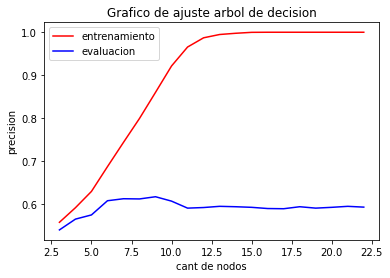

In [57]:
# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(3, 23))

for deep in max_deep_list:
    rf = DecisionTreeClassifier(criterion='entropy', max_depth=deep)
    rf.fit(X_train, y_train)
    train_prec.append(rf.score(X_train, y_train))
    eval_prec.append(rf.score(X_test, y_test))

# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('precision')
plt.xlabel('cant de nodos')
plt.show()

#### Conclusión
El gráfico que acabamos de construir se llama gráfico de ajuste y muestra la precisión del modelo en función de su complejidad. En nuestro ejemplo, podemos ver que el punto con mayor precisión, en los datos de test, lo obtenemos con un nivel de profundidad de aproximadamente 6 nodos; a partir de allí el modelo pierde en generalización y comienza a estar sobreajustado. Por lo tanto utilizaremos el parámetro max_depth = 6 o max_depth = 5.

In [58]:
# We ran a simple hyperparameter tuning for the number of trees, and concluded to use:
n_trees = 200
md = 6

In [59]:
# Fitting the RF model
rf_clf = RandomForestClassifier(n_estimators = n_trees, random_state = 0, n_jobs = 3,max_depth=md)
rf_clf.fit(X_train, y_train.astype(int))

RandomForestClassifier(max_depth=6, n_estimators=200, n_jobs=3, random_state=0)

-----Métricas------
Número de muestras clasificadas correctamente: 3318
Exactitud: 0.7261982928430729
Balance Accuracy score: 0.5269791802647861
Precision: 0.7199835929162125
Exhaustividad: 0.7261982928430729
F1: 0.7004900497847216
-------------------
              precision    recall  f1-score   support

           1       0.59      0.52      0.55       473
           2       0.55      0.75      0.64       625
           3       0.86      0.36      0.51       287
           4       0.87      0.96      0.91      1454
           5       0.55      0.62      0.58       317
           6       0.77      0.36      0.49       393
           7       0.74      0.94      0.82       794
           8       0.00      0.00      0.00       123
           9       0.92      0.23      0.37       103

    accuracy                           0.73      4569
   macro avg       0.65      0.53      0.54      4569
weighted avg       0.72      0.73      0.70      4569



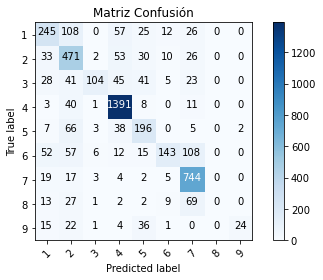

In [60]:
predictions = rf_clf.predict(X_train)
metricas_modelos('RFC-Train',y_train, predictions, [1,2,3,4,5,6,7,8,9])

In [61]:
# precisión del modelo en datos de entrenamiento.
print("Exactitud entranamiento: {0: .2f}".format(
        rf_clf.score(X_train, y_train)))

Exactitud entranamiento:  0.73


-----Métricas------
Número de muestras clasificadas correctamente: 1422
Exactitud: 0.660473757547608
Balance Accuracy score: 0.46736346566779147
Precision: 0.6483342902958027
Exhaustividad: 0.660473757547608
F1: 0.6276905774454778
-------------------
              precision    recall  f1-score   support

           1       0.50      0.48      0.49       230
           2       0.51      0.70      0.59       311
           3       0.71      0.17      0.27       142
           4       0.82      0.93      0.87       640
           5       0.47      0.54      0.50       151
           6       0.67      0.30      0.41       206
           7       0.68      0.88      0.77       366
           8       0.00      0.00      0.00        63
           9       0.82      0.20      0.33        44

    accuracy                           0.66      2153
   macro avg       0.58      0.47      0.47      2153
weighted avg       0.65      0.66      0.63      2153



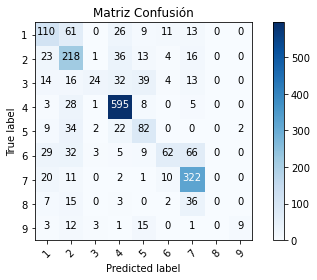

In [62]:
predictions = rf_clf.predict(X_test)
metricas_modelos('RFC-Test',y_test, predictions, [1,2,3,4,5,6,7,8,9])

In [63]:
# precisión del modelo en datos de evaluación.
print("Exactitud test: {0: .2f}".format(
        rf_clf.score(X_test, y_test)))

Exactitud test:  0.66


#### Model K-Nearest-Neighbor Classifier

In [64]:
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2).fit(X_train, y_train)

-----Métricas------
Número de muestras clasificadas correctamente: 3705
Exactitud: 0.8108995403808273
Balance Accuracy score: 0.7035276956450679
Precision: 0.8113135990591049
Exhaustividad: 0.8108995403808273
F1: 0.8048872794713643
-------------------
              precision    recall  f1-score   support

           1       0.67      0.75      0.71       473
           2       0.72      0.78      0.75       625
           3       0.79      0.60      0.68       287
           4       0.90      0.97      0.93      1454
           5       0.77      0.70      0.73       317
           6       0.79      0.55      0.65       393
           7       0.83      0.91      0.87       794
           8       0.92      0.45      0.60       123
           9       0.80      0.61      0.69       103

    accuracy                           0.81      4569
   macro avg       0.80      0.70      0.74      4569
weighted avg       0.81      0.81      0.80      4569



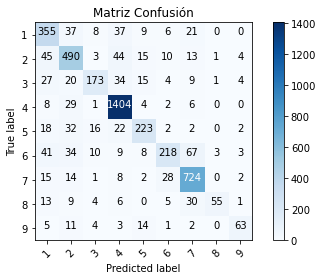

In [65]:
predictions = knn_clf.predict(X_train)
metricas_modelos('KNNC-Train',y_train, predictions, [1,2,3,4,5,6,7,8,9])

In [66]:
# precisión del modelo en datos de evaluación.
print("Exactitud entranamiento: {0: .2f}".format(
        knn_clf.score(X_train, y_train)))

Exactitud entranamiento:  0.81


-----Métricas------
Número de muestras clasificadas correctamente: 1492
Exactitud: 0.692986530422666
Balance Accuracy score: 0.5482451661557111
Precision: 0.685753940992656
Exhaustividad: 0.692986530422666
F1: 0.6821044832696284
-------------------
              precision    recall  f1-score   support

           1       0.53      0.61      0.57       230
           2       0.56      0.66      0.61       311
           3       0.55      0.32      0.41       142
           4       0.86      0.93      0.89       640
           5       0.52      0.47      0.49       151
           6       0.63      0.45      0.52       206
           7       0.78      0.85      0.81       366
           8       0.67      0.29      0.40        63
           9       0.42      0.36      0.39        44

    accuracy                           0.69      2153
   macro avg       0.61      0.55      0.57      2153
weighted avg       0.69      0.69      0.68      2153



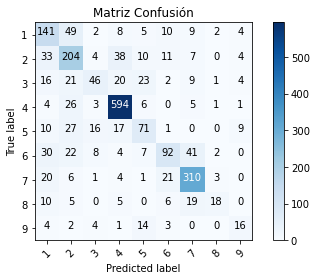

In [67]:
predictions = knn_clf.predict(X_test)
metricas_modelos('KNNC-Test',y_test, predictions, [1,2,3,4,5,6,7,8,9])

In [68]:
# precisión del modelo en datos de evaluación.
print("Exactitud test: {0: .2f}".format(
        knn_clf.score(X_test, y_test)))

Exactitud test:  0.69


#### Model Regresión Softmax (Logistic Regression) Classifier

In [69]:
lr_clf = LogisticRegression(multi_class='multinomial', solver='newton-cg',penalty='l2',C=10).fit(X_train, y_train)

-----Métricas------
Número de muestras clasificadas correctamente: 4036
Exactitud: 0.8833442766469687
Balance Accuracy score: 0.8628808949949435
Precision: 0.8833401094986584
Exhaustividad: 0.8833442766469687
F1: 0.8829396909828977
-------------------
              precision    recall  f1-score   support

           1       0.81      0.79      0.80       473
           2       0.76      0.81      0.78       625
           3       0.85      0.81      0.83       287
           4       0.96      0.96      0.96      1454
           5       0.87      0.87      0.87       317
           6       0.83      0.74      0.78       393
           7       0.92      0.94      0.93       794
           8       0.93      0.86      0.89       123
           9       0.94      0.97      0.96       103

    accuracy                           0.88      4569
   macro avg       0.87      0.86      0.87      4569
weighted avg       0.88      0.88      0.88      4569



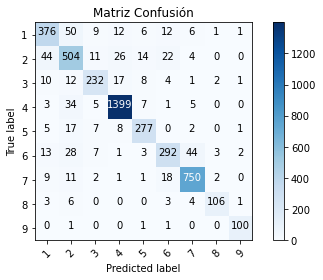

In [70]:
predictions = lr_clf.predict(X_train)
metricas_modelos('LRC-Train',y_train, predictions, [1,2,3,4,5,6,7,8,9])

In [71]:
# precisión del modelo en datos de evaluación.
print("Exactitud entranamiento: {0: .2f}".format(
        lr_clf.score(X_train, y_train)))

Exactitud entranamiento:  0.88


-----Métricas------
Número de muestras clasificadas correctamente: 1493
Exactitud: 0.6934509986065954
Balance Accuracy score: 0.6118955137380072
Precision: 0.6919209070659784
Exhaustividad: 0.6934509986065954
F1: 0.6917065351709001
-------------------
              precision    recall  f1-score   support

           1       0.53      0.60      0.56       230
           2       0.53      0.52      0.53       311
           3       0.48      0.37      0.42       142
           4       0.91      0.91      0.91       640
           5       0.55      0.61      0.58       151
           6       0.54      0.50      0.52       206
           7       0.81      0.83      0.82       366
           8       0.57      0.59      0.58        63
           9       0.54      0.59      0.57        44

    accuracy                           0.69      2153
   macro avg       0.61      0.61      0.61      2153
weighted avg       0.69      0.69      0.69      2153



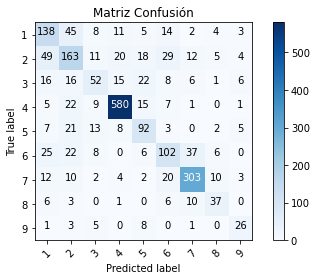

In [72]:
predictions = lr_clf.predict(X_test)
metricas_modelos('LRC-Test',y_test, predictions, [1,2,3,4,5,6,7,8,9])

In [73]:
# precisión del modelo en datos de evaluación.
print("Exactitud test: {0: .2f}".format(
        lr_clf.score(X_test, y_test)))

Exactitud test:  0.69


#### Model Ensembles: Voting Classifier

Los sistemas de votación buscan obtener un modelo mejor mediante la combinación de diferentes modelos. Para ello se entrena cada uno de los modelos para que realice una predicción y posteriormente decide por votación mayoritaria cual es la predicción para cada registro.

- ***Soft***: a la hora de realizar la votación se tiene en cuenta la probabilidad de cada una de las clases en el modelo. Si el modelo lo soporta, en scikit-learn solamente los modelos que tienen el método ***predict_proba***. El algoritmo SVM no predice probabilidades de forma nativa, aunque se puede configurar para predecir puntajes similares a la probabilidad estableciendo el argumento ***probability=True*** en la clase SVC.
- ***Hard***: cada uno de los modelos vota por su ganador, independiente de la probabilidad que devuelva cada modelo.

In [74]:
voting_clf = VotingClassifier(
    estimators=[('rf', rf_clf),
                ('knn', knn_clf),
                ('lr', lr_clf)],
    voting='hard').fit(X_train, y_train)

-----Métricas------
Número de muestras clasificadas correctamente: 3827
Exactitud: 0.8376012256511272
Balance Accuracy score: 0.7331223828131761
Precision: 0.8479626280166453
Exhaustividad: 0.8376012256511272
F1: 0.8324713318214668
-------------------
              precision    recall  f1-score   support

           1       0.69      0.78      0.73       473
           2       0.70      0.86      0.77       625
           3       0.88      0.64      0.74       287
           4       0.92      0.97      0.94      1454
           5       0.82      0.76      0.79       317
           6       0.89      0.55      0.68       393
           7       0.86      0.94      0.90       794
           8       1.00      0.43      0.60       123
           9       0.99      0.66      0.79       103

    accuracy                           0.84      4569
   macro avg       0.86      0.73      0.77      4569
weighted avg       0.85      0.84      0.83      4569



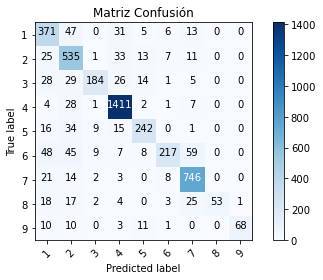

In [75]:
predictions = voting_clf.predict(X_train)
metricas_modelos('VC-Train',y_train, predictions, [1,2,3,4,5,6,7,8,9])

In [76]:
# precisión del modelo en datos de evaluación.
print("Exactitud entranamiento: {0: .2f}".format(
        voting_clf.score(X_train, y_train)))

Exactitud entranamiento:  0.84


-----Métricas------
Número de muestras clasificadas correctamente: 1531
Exactitud: 0.7111007895959127
Balance Accuracy score: 0.5648082648396018
Precision: 0.7251347508934148
Exhaustividad: 0.7111007895959127
F1: 0.6995238540595433
-------------------
              precision    recall  f1-score   support

           1       0.48      0.67      0.56       230
           2       0.55      0.70      0.61       311
           3       0.65      0.28      0.39       142
           4       0.88      0.94      0.91       640
           5       0.61      0.55      0.58       151
           6       0.77      0.42      0.54       206
           7       0.81      0.86      0.83       366
           8       0.84      0.25      0.39        63
           9       0.67      0.41      0.51        44

    accuracy                           0.71      2153
   macro avg       0.69      0.56      0.59      2153
weighted avg       0.73      0.71      0.70      2153



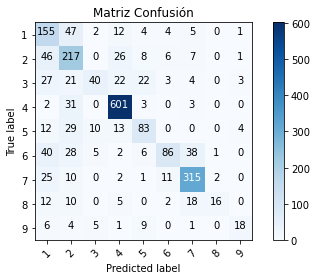

In [77]:
predictions = voting_clf.predict(X_test)
metricas_modelos('VC-Test',y_test, predictions, [1,2,3,4,5,6,7,8,9])

In [78]:
# precisión del modelo en datos de evaluación.
print("Exactitud test: {0: .2f}".format(
        voting_clf.score(X_test, y_test)))

Exactitud test:  0.71


#### Model Ensembles: Bagging Classifier (SVC)

In [79]:
#Whether samples are drawn with replacement. If False, sampling without replacement is performed
#bootstrap=True->Bagging
#bootstrap=False->Pasting
clf = BaggingClassifier(base_estimator=SVC(),
                         n_estimators=10, random_state=0, bootstrap=False).fit(X_train, y_train)

#clf = BaggingClassifier(LogisticRegression(multi_class='multinomial', solver='newton-cg',penalty='l2',C=10),
#                         n_estimators=10, random_state=0, bootstrap=False).fit(X_train, y_train)

#clf = BaggingClassifier(KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', 
#                           leaf_size=10, p=2, metric='minkowski', metric_params=None, n_jobs=-1),
#                               n_estimators=10, random_state=0, bootstrap=False).fit(X_train, y_train)

-----Métricas------
Número de muestras clasificadas correctamente: 3655
Exactitud: 0.7999562267454585
Balance Accuracy score: 0.6731893532947876
Precision: 0.8073750633876444
Exhaustividad: 0.7999562267454585
F1: 0.7948236296141854
-------------------
              precision    recall  f1-score   support

           1       0.70      0.65      0.67       473
           2       0.62      0.81      0.70       625
           3       0.80      0.64      0.71       287
           4       0.92      0.95      0.94      1454
           5       0.69      0.69      0.69       317
           6       0.80      0.59      0.68       393
           7       0.84      0.92      0.88       794
           8       0.92      0.40      0.56       123
           9       0.86      0.41      0.55       103

    accuracy                           0.80      4569
   macro avg       0.80      0.67      0.71      4569
weighted avg       0.81      0.80      0.79      4569



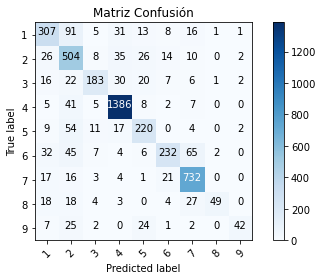

In [80]:
predictions = clf.predict(X_train)
metricas_modelos('BC-SVC-Train',y_train, predictions, [1,2,3,4,5,6,7,8,9])

In [81]:
# precisión del modelo en datos de evaluación.
print("Exactitud entranamiento: {0: .2f}".format(
        clf.score(X_train, y_train)))

Exactitud entranamiento:  0.80


-----Métricas------
Número de muestras clasificadas correctamente: 1541
Exactitud: 0.7157454714352067
Balance Accuracy score: 0.5803501915673742
Precision: 0.7218493045821682
Exhaustividad: 0.7157454714352067
F1: 0.7091859860316303
-------------------
              precision    recall  f1-score   support

           1       0.55      0.56      0.55       230
           2       0.54      0.72      0.62       311
           3       0.64      0.39      0.49       142
           4       0.90      0.92      0.91       640
           5       0.55      0.58      0.56       151
           6       0.64      0.50      0.57       206
           7       0.79      0.86      0.82       366
           8       0.88      0.35      0.50        63
           9       0.71      0.34      0.46        44

    accuracy                           0.72      2153
   macro avg       0.69      0.58      0.61      2153
weighted avg       0.72      0.72      0.71      2153



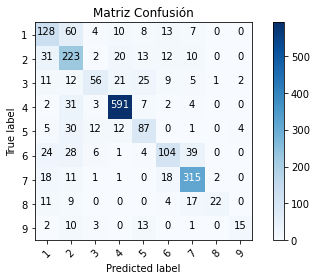

In [82]:
predictions = clf.predict(X_test)
metricas_modelos('BC-SVC-Test',y_test, predictions, [1,2,3,4,5,6,7,8,9])

In [83]:
# precisión del modelo en datos de evaluación.
print("Exactitud test: {0: .2f}".format(
        clf.score(X_test, y_test)))

Exactitud test:  0.72


#### Model Ensembles: Boosting Classifier (Ada Boost)

In [84]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5).fit(X_train, y_train)

-----Métricas------
Número de muestras clasificadas correctamente: 4139
Exactitud: 0.9058875027358284
Balance Accuracy score: 0.896465520185527
Precision: 0.9091251424185672
Exhaustividad: 0.9058875027358284
F1: 0.9062386849378711
-------------------
              precision    recall  f1-score   support

           1       0.92      0.81      0.86       473
           2       0.78      0.90      0.83       625
           3       0.94      0.88      0.91       287
           4       0.94      0.94      0.94      1454
           5       0.89      0.87      0.88       317
           6       0.90      0.84      0.87       393
           7       0.93      0.96      0.94       794
           8       1.00      0.89      0.94       123
           9       1.00      0.98      0.99       103

    accuracy                           0.91      4569
   macro avg       0.92      0.90      0.91      4569
weighted avg       0.91      0.91      0.91      4569



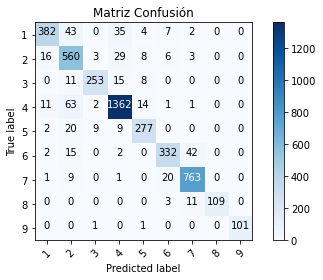

In [85]:
predictions = ada_clf.predict(X_train)
metricas_modelos('BC-AB-Train',y_train, predictions, [1,2,3,4,5,6,7,8,9])

In [86]:
# precisión del modelo en datos de evaluación.
print("Exactitud entranamiento: {0: .2f}".format(
        ada_clf.score(X_train, y_train)))

Exactitud entranamiento:  0.91


-----Métricas------
Número de muestras clasificadas correctamente: 1379
Exactitud: 0.6405016256386438
Balance Accuracy score: 0.49073738758641205
Precision: 0.6675706702720543
Exhaustividad: 0.6405016256386438
F1: 0.6334217450519877
-------------------
              precision    recall  f1-score   support

           1       0.52      0.50      0.51       230
           2       0.44      0.77      0.56       311
           3       0.57      0.31      0.40       142
           4       0.87      0.83      0.85       640
           5       0.47      0.41      0.44       151
           6       0.49      0.42      0.45       206
           7       0.77      0.78      0.77       366
           8       0.88      0.11      0.20        63
           9       0.81      0.30      0.43        44

    accuracy                           0.64      2153
   macro avg       0.65      0.49      0.51      2153
weighted avg       0.67      0.64      0.63      2153



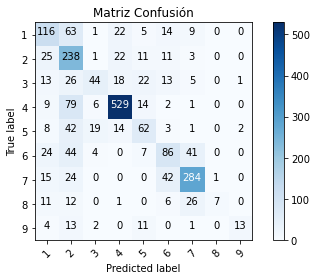

In [87]:
predictions = ada_clf.predict(X_test)
metricas_modelos('BC-AB-Test',y_test, predictions, [1,2,3,4,5,6,7,8,9])

In [88]:
# precisión del modelo en datos de evaluación.
print("Exactitud test: {0: .2f}".format(
        ada_clf.score(X_test, y_test)))

Exactitud test:  0.64


#### Model Ensembles: Boosting Classifier (Gradient Boosting)

In [89]:
gbrt_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                      max_depth=1, random_state=0).fit(X_train, y_train)

-----Métricas------
Número de muestras clasificadas correctamente: 3333
Exactitud: 0.7294812869336835
Balance Accuracy score: 0.4993772631006715
Precision: 0.7333295596500183
Exhaustividad: 0.7294812869336835
F1: 0.7035950994813782
-------------------
              precision    recall  f1-score   support

           1       0.70      0.74      0.72       473
           2       0.59      0.76      0.66       625
           3       0.35      0.35      0.35       287
           4       0.91      0.96      0.94      1454
           5       0.40      0.25      0.31       317
           6       0.55      0.49      0.52       393
           7       0.83      0.93      0.87       794
           8       1.00      0.01      0.02       123
           9       1.00      0.01      0.02       103

    accuracy                           0.73      4569
   macro avg       0.70      0.50      0.49      4569
weighted avg       0.73      0.73      0.70      4569



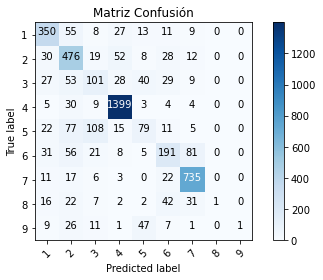

In [90]:
predictions = gbrt_clf.predict(X_train)
metricas_modelos('BC-GB-Train',y_train, predictions, [1,2,3,4,5,6,7,8,9])

In [91]:
# precisión del modelo en datos de evaluación.
print("Exactitud entranamiento: {0: .2f}".format(
        gbrt_clf.score(X_train, y_train)))

Exactitud entranamiento:  0.73


-----Métricas------
Número de muestras clasificadas correctamente: 1335
Exactitud: 0.6200650255457502
Balance Accuracy score: 0.41660188110962076
Precision: 0.6130772353945834
Exhaustividad: 0.6200650255457502
F1: 0.5984820953154079
-------------------
              precision    recall  f1-score   support

           1       0.44      0.57      0.50       230
           2       0.46      0.57      0.51       311
           3       0.33      0.30      0.32       142
           4       0.86      0.91      0.88       640
           5       0.36      0.19      0.25       151
           6       0.43      0.39      0.41       206
           7       0.74      0.80      0.77       366
           8       1.00      0.02      0.03        63
           9       0.00      0.00      0.00        44

    accuracy                           0.62      2153
   macro avg       0.51      0.42      0.41      2153
weighted avg       0.61      0.62      0.60      2153



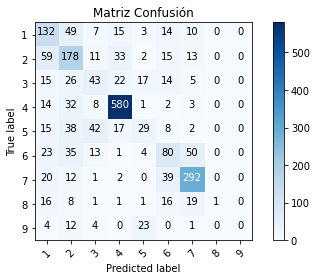

In [92]:
predictions = gbrt_clf.predict(X_test)
metricas_modelos('BC-GB-Test',y_test, predictions, [1,2,3,4,5,6,7,8,9])

In [93]:
# precisión del modelo en datos de evaluación.
print("Exactitud test: {0: .2f}".format(
        gbrt_clf.score(X_test, y_test)))

Exactitud test:  0.62


# PENDIENTEEEEEEEEEEEEEEEEEEEEE

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
  df.drop(['field_id','label'], axis=1),
  df['label'],
  test_size=0.3,
  random_state=42,
  shuffle=True,
  stratify=df['label']
)

In [ ]:
random_state = 42
leaf_nodes = 5
num_features = 10
num_estimators = 100
numerical_features = X_train.columns.tolist()
# Decision tree for bagging
tree_clf = DecisionTreeClassifier(
  splitter='random',
  max_leaf_nodes=leaf_nodes,
  random_state=random_state
)
# Initialize the bagging classifier
bag_clf = BaggingClassifier(
  tree_clf,
  n_estimators=num_estimators,
  max_samples=1.0,
  max_features=1.0,
  random_state=random_state,
  n_jobs=-1
)
# Create a pipeline
pipe = Pipeline([
  ('preproc', PreprocessTransformer(numerical_features)),
  ('fs', SelectKBest()),
  ('clf', DecisionTreeClassifier())
])

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer
# Define our search space for grid search
search_space = [
  {
    'clf': [DecisionTreeClassifier()],
    'clf__max_leaf_nodes': [128],
    'clf__max_depth':[4,5,6],
    'fs__score_func': [chi2],
    'fs__k': [200],
  },
  {
    'clf': [RandomForestClassifier()],
    'clf__n_estimators': [200],
    'clf__max_leaf_nodes': [128],
    'clf__bootstrap': [False, True],
    'clf__max_depth':[5,6],
    'fs__score_func': [chi2],
    'fs__k': [200],
  }
]
# Define scoring
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score)}
# Define cross validation
kfold = KFold(n_splits=100)#random_state=42
# Define grid search
grid = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)
# Fit grid search
model = grid.fit(X_train, y_train)

In [ ]:
grid.cv_results_

In [ ]:
best_estimator = grid.best_estimator_.steps[-1][1]
columns = X_test.columns.tolist()
print('Feature Importances')
                             
for i, imp in enumerate(best_estimator.feature_importances_):
  print('{}: {:.3f}'.format(columns[i], imp))

In [ ]:
print('Mean Test Accuracy',grid.cv_results_['mean_test_Accuracy'],'\n')
print('Mean Test AUC',grid.cv_results_['mean_test_AUC'],'\n')
print('Parameters Best Model',grid.cv_results_['params'])

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_estimator_.steps[-1][1]

### Conclusión

In [94]:
prec_global = [rf_clf.score(X_test, y_test),
               knn_clf.score(X_test, y_test),
               lr_clf.score(X_test, y_test),
               voting_clf.score(X_test, y_test),
               clf.score(X_test, y_test),
              ada_clf.score(X_test, y_test),
              gbrt_clf.score(X_test, y_test),]
prec_global, type(prec_global)

([0.660473757547608,
  0.692986530422666,
  0.6934509986065954,
  0.7111007895959127,
  0.7157454714352067,
  0.6405016256386438,
  0.6200650255457502],
 list)

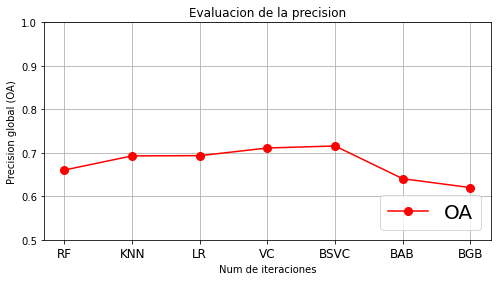

In [95]:
x = [1,2,3,4,5,6,7]
labels = ['RF','KNN','LR','VC','BSVC','BAB','BGB']

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, prec_global, marker = 'o', ms = 8, color="red", label="OA")
ax.set_xticks(x) 
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylabel("Precision global (OA)")
ax.set_xlabel("Num de iteraciones")
ax.set_ylim(bottom=0.5, top=1)
ax.set_title("Evaluacion de la precision")
ax.grid(True)
ax.legend(loc="lower right", fontsize=20);

In [96]:
resultados=pd.DataFrame({'Modelo':l_modelo,'Exactitud': l_exactitud, 'Exactitud Bal.': l_bexactitud,
             'Precisión':l_precision,'Exhaustividad': l_exhaustividad, 'F1': l_f1})

In [97]:
resultados.round(2)

,Modelo,Exactitud,Exactitud Bal.,Precisión,Exhaustividad,F1
0,RFC-Train,72.62,52.70,72.00,72.62,70.05
1,RFC-Test,66.05,46.74,64.83,66.05,62.77
2,KNNC-Train,81.09,70.35,81.13,81.09,80.49
3,KNNC-Test,69.30,54.82,68.58,69.30,68.21
4,LRC-Train,88.33,86.29,88.33,88.33,88.29
5,LRC-Test,69.35,61.19,69.19,69.35,69.17
6,VC-Train,83.76,73.31,84.80,83.76,83.25
7,VC-Test,71.11,56.48,72.51,71.11,69.95
8,BC-SVC-Train,80.00,67.32,80.74,80.00,79.48
9,BC-SVC-Test,71.57,58.04,72.18,71.57,70.92


In [ ]:
#calculo PCa Manual
#https://empresas.blogthinkbig.com/python-para-todos-que-es-el-pca/
#https://empresas.blogthinkbig.com/python-para-todos-tutorial-de-pca-en-5/
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)
# calculate the mean of each column
M = mean(A.T, axis=1)
print(M)
# center columns by subtracting column means
C = A - M
print(C)
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)